# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [61]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable


import seaborn as sns
import scipy as sp


In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.shape

(16860, 12)

In [6]:
hospital_read_df.describe()
hospital_read_df.dtypes

Hospital Name                  object
Provider Number                 int64
State                          object
Measure Name                   object
Number of Discharges           object
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions        float64
Start Date                     object
End Date                       object
dtype: object

****
## Preliminary Analysis

In [20]:
hospital_read_df.sample(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
598,AVOYELLES HOSPITAL,190099,LA,READM-30-HF-HRRP,204,NaN,1.1595,25.1,21.7,60.0,07/01/2010,06/30/2013
2900,COLISEUM MEDICAL CENTERS,110164,GA,READM-30-PN-HRRP,309,NaN,1.0633,18.5,17.4,61.0,07/01/2010,06/30/2013
3480,GETTYSBURG HOSPITAL,390065,PA,READM-30-PN-HRRP,380,NaN,1.0513,17.9,17.0,71.0,07/01/2010,06/30/2013
5377,WILLIAMSON MEDICAL CENTER,440029,TN,READM-30-AMI-HRRP,115,NaN,1.0192,15.7,15.4,19.0,07/01/2010,06/30/2013
3767,MEDSTAR WASHINGTON HOSPITAL CENTER,90011,DC,READM-30-HF-HRRP,1569,NaN,1.0454,24.5,23.4,387.0,07/01/2010,06/30/2013


In [47]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df.shape
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')


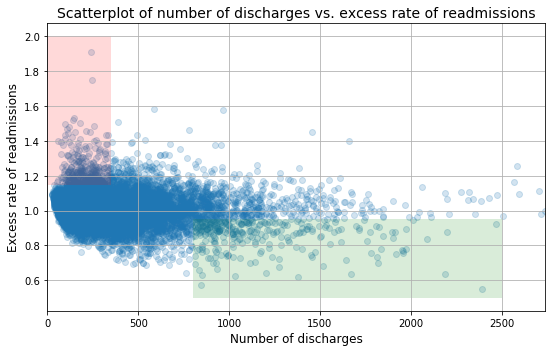

In [48]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

In [51]:
print(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <100]['Excess Readmission Ratio'].describe())
print(np.percentile(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <100]['Excess Readmission Ratio'], 37))
print(np.percentile(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <100]['Excess Readmission Ratio'], 25))


count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: Excess Readmission Ratio, dtype: float64
nan
nan


In [52]:
clean_hospital_read_df['Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].replace(np.nan, 0)
print(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >1000]['Excess Readmission Ratio'].describe())

print(np.percentile(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >1000]['Excess Readmission Ratio'], 55))
print(np.percentile(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >1000]['Excess Readmission Ratio'], 56))
 

count    463.000000
mean       0.978335
std        0.120007
min        0.549500
25%        0.907900
50%        0.986400
75%        1.057100
max        1.454300
Name: Excess Readmission Ratio, dtype: float64
0.99865
1.000272


In [67]:

x = pd.DataFrame(x)
y = pd.DataFrame(y)
data_df = pd.concat([x,y], axis=1)
data_df.columns = ['numofdischarges', 'rateofreadmissions']
data_df.head()

,numofdischarges,rateofreadmissions
0,25,1.0914
1,27,1.0961
2,28,1.0934
3,29,1.0908
4,30,1.1123


In [56]:
data_df.shape

(11494, 2)

In [ ]:
B. Statistics

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

Both these assumptions are true depending on the reluts obtained below-



In [58]:
print(data_df[data_df['numofdischarges'] <100]['rateofreadmissions'].describe())
print(np.percentile(data_df[data_df['numofdischarges'] <100]['rateofreadmissions'], 37))
print(np.percentile(data_df[data_df['numofdischarges'] <100]['rateofreadmissions'], 36))


count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: rateofreadmissions, dtype: float64
1.000438
0.9992639999999999


In [59]:
print(data_df[data_df['numofdischarges'] <100]['rateofreadmissions'].describe())
print(np.percentile(data_df[data_df['numofdischarges'] >1000]['rateofreadmissions'], 55))
print(np.percentile(data_df[data_df['numofdischarges'] >1000]['rateofreadmissions'], 56))


count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: rateofreadmissions, dtype: float64
0.9988250000000001
1.000308


A. Initial observations based on the plot above

Overall, rate of readmissions is trending down with increasing number of discharges
With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

/Users/ashish/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


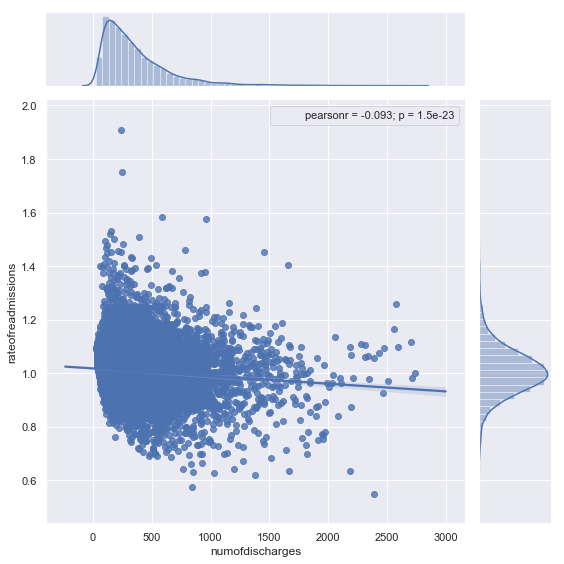

In [70]:
import scipy.stats as stats
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('numofdischarges', 'rateofreadmissions', data=data_df, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

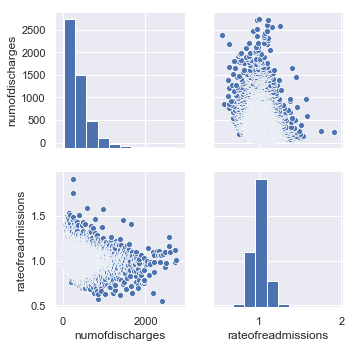

In [78]:
from scipy.stats import pearsonr

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

j = graph = sns.pairplot(data_df)
plt.show()

With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)¶

with a perasonr value being negative, it shows there is negative corelation between number of discharges and rate of readmissions


next lets check if With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)¶ 

/Users/ashish/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


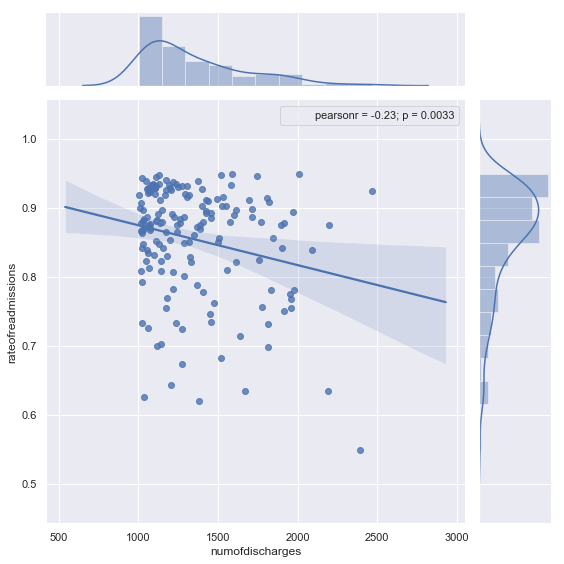

In [83]:
hidischarge_df = data_df[data_df.numofdischarges>1000]
hidischarge_df = hidischarge_df[hidischarge_df.rateofreadmissions<0.95]
j = sns.jointplot('numofdischarges', 'rateofreadmissions', data=hidischarge_df, kind='reg', height=8)
j.annotate(stats.pearsonr)
plt.show()

The small p value associated to negative co-relation shows this is true

In [ ]:
New Hypothesis Testing

 1. Test
We will use t statistic test two sided for this problem

2. Hypothesis

Null Hypothesis 
    Ho: There is no significant correlation between hospital capacity(number of discharges) and readmission rates
Alternate Hypothesis H1: 
    H1: There is significant correlation between hospital capacity(number of discharges) and readmission rates
3. Significance
Confidence Level : 95%

4. Interpretation
Reject the null hypothesis if p value< a 

In [84]:
data_df.isnull().sum()

numofdischarges       0
rateofreadmissions    0
dtype: int64

In [85]:
data_df.corr()

,numofdischarges,rateofreadmissions
numofdischarges,1.000000,-0.093096
rateofreadmissions,-0.093096,1.000000


In [86]:
r_val = -0.093096
r_sq = r_val **2
r_sq

0.008666865216

In [92]:
#sample size
n1=data_df.shape[0]
#deg of freedom
df1 = n1-1
t1=(r_val*((n1-2)/(1-r_val**2))**0.5)
t1

-10.023491322343936

In [93]:
p_value1 = stats.t.sf(np.abs(t1), df1)*2  # two-sided pvalue = Prob(abs(t)>tt)
p_value1

1.5014985503434363e-23

alpha = 0.05 with 95% confidence level
Since our P value < alpha, we reject Ho and accept H1: There is significant correlation between hospital capacity and excess readmission ratio.

Question- Report statistical significance for alpha = .01
answer- Since our P value < alpha even with this new value of alpha, we reject Ho and 
accept H1: There is significant correlation between hospital capacity and excess readmission ratio.

Question-Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

X label, y label, title and data points are marked clearly. However it fails to convey any clear message. Also there was no need for red nd green boxes in the scatter plot. Same could have been visually representated by slicing a data set and then plotting it.

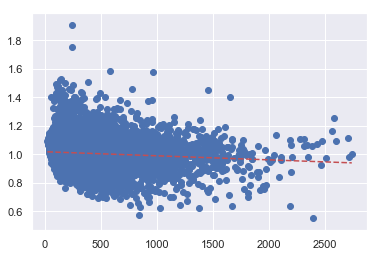

In [105]:
# plot the data itself



x=sorted(data_df.numofdischarges)
y = data_df.rateofreadmissions
plt.scatter(x, y)
# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
